# <font color='#3e9dbf'>Import Library and Dataset</font>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from tabulate import tabulate

# For KNN
import itertools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
url = "../iris.data"
columns_iris = ["sepal length", "sepal width", "petal length", "petal width", "class"]

dataset = pd.read_csv(url, names=columns_iris, sep=',', na_values='?', skipinitialspace =True)

# <font color='#3e9dbf'>Function</font>

## <font color='#e89c9a'><ul><li>Show Statistical values</li></ul></font>

In [3]:
def showStatistics(attr_name):
  
  table = []
  data = dataset[attr_name]

  table.append(['Mean: ', f"{data.mean():,.4f}"])
  table.append(['Median: ', f"{data.median():,.4f}"])
  table.append(['Mode: ', f"{data.mode().iloc[0]:,}"])
  table.append(['SD: ', f"{data.std():,.4f}"])
  table.append(['Variance: ', f"{data.var():,.4f}"])
  table.append(['Min: ', f"{data.min():,}"])
  table.append(['Q₁: ', f"{data.quantile(.25):,.4f}"])
  table.append(['Q₂: ', f"{data.quantile(.50):,.4f}"])
  table.append(['Q₃: ', f"{data.quantile(.75):,.4f}"])
  table.append(['Max: ', f"{data.max():,}"])
  table.append(['Skewness: ', f"{data.skew():,.4f}"])

  print(tabulate(table, headers=['', 'Value'], tablefmt='grid'))

## <font color='#e89c9a'><ul><li>Plot Histograms</li></ul></font>

In [4]:
def plot_histogram(attr_name):
  skewness = round(dataset[attr_name].skew(), 4)
  plt.figure(figsize=(9, 6))
  dataset[attr_name].hist(bins=10, color='#e9c7c6').set_facecolor("none")

  title = ' '.join([word.capitalize() for word in attr_name.split()])

  plt.title(title)
  plt.xlabel(title)
  plt.ylabel('Frequency')
  plt.legend([f'Skewness: {skewness}'], frameon=False)

  ax = plt.gca()
  ax.spines['top'].set_color('#4c4b49')
  ax.spines['right'].set_color('#4c4b49')
  ax.spines['left'].set_color('#4c4b49')
  ax.spines['bottom'].set_color('#4c4b49')
  ax.tick_params(axis='both', colors='#4c4b49')

  plt.gca().tick_params(axis='both', colors='#4c4b49')
  plt.tight_layout()
  plt.gcf().set_facecolor("none")
  plt.show()

## <font color='#e89c9a'><ul><li>Comparison Variables by Class</li></ul></font>

In [5]:
def comparison_by_class(attr_name):
  
  title = ' '.join([word.capitalize() for word in attr_name.split()])
  palette = {'Iris-setosa': '#e9c7c6', 'Iris-versicolor': '#9fc3d0', 'Iris-virginica': '#c6e9c7'}

  plt.figure(figsize=(9, 6))
  sns.boxplot(x='class', y=attr_name, hue='class', data=dataset, palette=palette, dodge=False).set_facecolor("none")
  plt.title(f'Boxplot: Comparison of {title} by Class')
  plt.xlabel('Class')
  plt.ylabel(title)
  plt.gca()
  plt.gcf().set_facecolor("none")
  plt.show()

  plt.figure(figsize=(9, 6))
  sns.kdeplot(data=dataset, x=attr_name, hue='class', fill=True, common_norm=False, palette=palette).set_facecolor("none")
  plt.title(f'KDE Plot: Comparison of {title} by Class')
  plt.xlabel(title)
  plt.ylabel('Density')
  plt.gcf().set_facecolor("none")
  # plt.savefig(f'./kde_plot_{attr_name}.png', transparent=True, bbox_inches='tight')
  plt.show()

  plt.figure(figsize=(9, 6))
  sns.histplot(data=dataset, x=attr_name, hue='class', multiple='stack', palette=palette, kde=True)
  plt.title(f'Histogram: Comparison of {title} by Class')
  plt.xlabel(title)
  plt.ylabel('Frequency')
  plt.gcf().set_facecolor("none")
  plt.show()

In [6]:
def calculate_class_statistics(attr_name):
  # Create an empty list to store statistics
  stats_list = []

  # Loop through each class and calculate statistics
  for class_name, group in dataset.groupby('class'):
    stats = {
      'Class': class_name,
      'Mean': round(group[attr_name].mean(), 4),
      'Median': round(group[attr_name].median(), 4),
      'Mode': round(group[attr_name].mode().iloc[0], 4),
      'SD': round(group[attr_name].std(), 4),
      'Variance': round(group[attr_name].var(), 4),
      'Min': round(group[attr_name].min(), 4),
      'Q₁': round(group[attr_name].quantile(.25), 4),
      'Q₂': round(group[attr_name].quantile(.50), 4),
      'Q₃': round(group[attr_name].quantile(.75), 4),
      'Max': round(group[attr_name].max(), 4),
      'Skewness': round(group[attr_name].skew(), 4)
    }
    stats_list.append(stats)

  # Example usage
  stats_df = pd.DataFrame(stats_list)
  print(tabulate(stats_df, headers='keys', tablefmt='grid'))

## <font color='#e89c9a'><ul><li>KNN Function</li></ul></font>

In [7]:
uniform_color = '#1178be'
distance_color = '#be5711'

### <font color='#9ae89c'><ul style="list-style-type:circle;"><li>Spilt Train and test Data</li></ul></font>

In [8]:
def split_data(test_size=0.2):
  X = dataset.iloc[:, :-1].values
  y = dataset.iloc[:, 4].values
  
  print(f"X shape: {X.shape}")
  print(f"y shape: {y.shape}")
  return train_test_split(X, y, test_size=test_size, random_state=42)

In [9]:
def show_class_counts(y_train, y_test):
  # Training data class counts
  unique, counts = np.unique(y_train, return_counts=True)
  class_counts_train = dict(zip(unique, counts))
  df_train = pd.DataFrame(list(class_counts_train.items()), columns=['Class', 'Train Count'])

  # Testing data class counts
  unique, counts = np.unique(y_test, return_counts=True)
  class_counts_test = dict(zip(unique, counts))
  df_test = pd.DataFrame(list(class_counts_test.items()), columns=['Class', 'Test Count'])

  # Merge the two dataframes
  df_combined = pd.merge(df_train, df_test, on='Class', how='outer')

  # Add total row
  total_train = df_combined['Train Count'].sum()
  total_test = df_combined['Test Count'].sum()
  total_row = pd.DataFrame([['Total', total_train, total_test]], columns=['Class', 'Train Count', 'Test Count'])
  df_combined = pd.concat([df_combined, total_row], ignore_index=True)

  print("Training and Testing Data Class Counts:")
  print(tabulate(df_combined, headers='keys', tablefmt='grid'))

### <font color='#9ae89c'><ul style="list-style-type:circle;"><li>Confusion Matrix</li></ul></font>

In [10]:
def plot_confusion_matrix(cm, classes, weight_type, ratio, normalize=False):
  cmap = plt.cm.Blues if weight_type == 'uniform' else plt.cm.Oranges

  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")
  else:
    print('Confusion matrix, without normalization')

  plt.figure(figsize=(10, 10))
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(f'Iris Confusion Matrix | Weight: {weight_type.capitalize()}', size=16, pad=22)
  plt.colorbar(aspect=4)
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, size=18)
  plt.yticks(tick_marks, classes, size=18)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.

  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt), fontsize=30, horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

  plt.gca().set_facecolor('none')
  plt.grid(None)
  plt.tight_layout()
  plt.ylabel('Actual', size=16)
  plt.xlabel('Predicted', size=16, labelpad=20)

  # plt.savefig(f'./img/confusion_matrix_{ratio[0]}-{ratio[1]}_weight_{weight_type}.png', transparent=True)
  plt.show()

### <font color='#9ae89c'><ul style="list-style-type:circle;"><li>Error rate</li></ul></font>

In [11]:
def calculate_error_rate(X_train, y_train, X_test, y_test, weights='uniform'):
  error = []
  minError = (1, 0)
  maxError = (1, 0)

  # Calculating error for K values between 1 and 40
  for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i, weights=weights)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate = np.mean(pred_i != y_test)
    error.append(error_rate)

    if error_rate < minError[1] or minError == (1, 0):
      minError = (i, error_rate)
    if error_rate > maxError[1]:
      maxError = (i, error_rate)

  return error, minError, maxError

In [12]:
def plot_error_rate(X_train, y_train, X_test, y_test):
  error_uniform, minError_uniform, maxError_uniform = calculate_error_rate(X_train, y_train, X_test, y_test, weights='uniform')
  error_distance, minError_distance, maxError_distance = calculate_error_rate(X_train, y_train, X_test, y_test, weights='distance')
  
  table = []

  table.append(['Uniform: ', minError_uniform[0], maxError_uniform[0], round(minError_uniform[1], 2), round(maxError_uniform[1], 2)])
  table.append(['Distance: ', minError_distance[0], maxError_distance[0], round(minError_distance[1], 2), round(maxError_distance[1], 2)])
  print(tabulate(table, headers=['Weights', 'K Min', 'K Max', 'Min Mean Error', 'Max Mean Error'], tablefmt='grid'))

  plt.figure(figsize=(12, 6))
  plt.plot(range(1, 40), error_uniform, color=uniform_color, linestyle='dashed', marker='o', markerfacecolor=uniform_color, markersize=15, label='Uniform')
  plt.plot(range(1, 40), error_distance, color=distance_color, linestyle='dashed', marker='o', markerfacecolor=distance_color, markersize=15, label='Distance')
  plt.xlabel('K Value', fontsize=20)  # Changed font size
  plt.ylabel('Mean Error', fontsize=20)  # Changed font size
  plt.xticks(fontsize=18)
  plt.yticks(fontsize=18)
  plt.legend(fontsize=18)
  plt.show()

  return minError_uniform[0], minError_distance[0], maxError_uniform[0], maxError_distance[0]


# <font color='#3e9dbf'>Basic information and statistics</font>

## <font color='#e89c9a'><ul><li>Class</li></ul></font>

In [13]:
print(dataset['class'].value_counts())
print('Unique: ', len(dataset['class'].unique()))

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64
Unique:  3


## <font color='#e89c9a'><ul><li>Sepal Length</li></ul></font>

In [14]:
attr_name = 'sepal length'

+-----------+---------+
|           |   Value |
+===========+=========+
| Mean:     |  5.8433 |
+-----------+---------+
| Median:   |  5.8    |
+-----------+---------+
| Mode:     |  5      |
+-----------+---------+
| SD:       |  0.8281 |
+-----------+---------+
| Variance: |  0.6857 |
+-----------+---------+
| Min:      |  4.3    |
+-----------+---------+
| Q₁:       |  5.1    |
+-----------+---------+
| Q₂:       |  5.8    |
+-----------+---------+
| Q₃:       |  6.4    |
+-----------+---------+
| Max:      |  7.9    |
+-----------+---------+
| Skewness: |  0.3149 |
+-----------+---------+


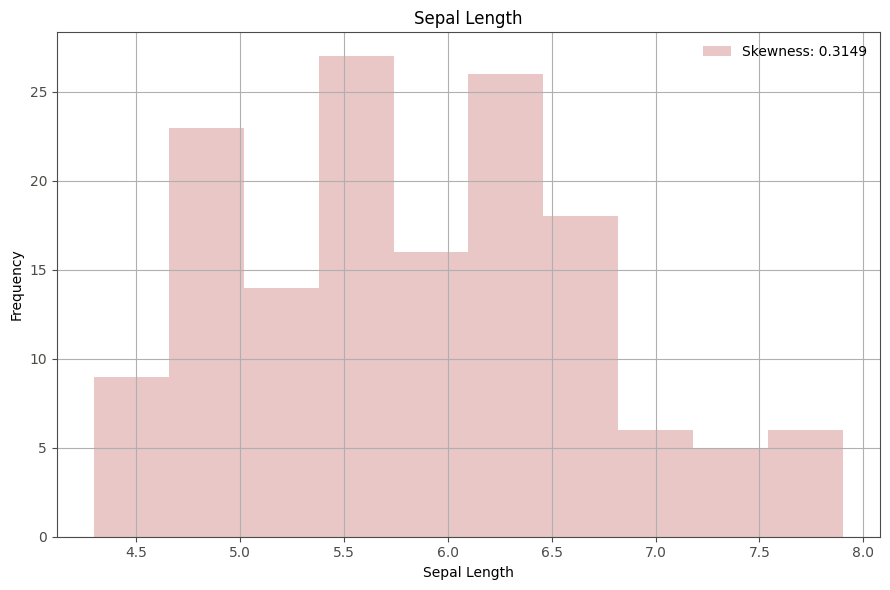

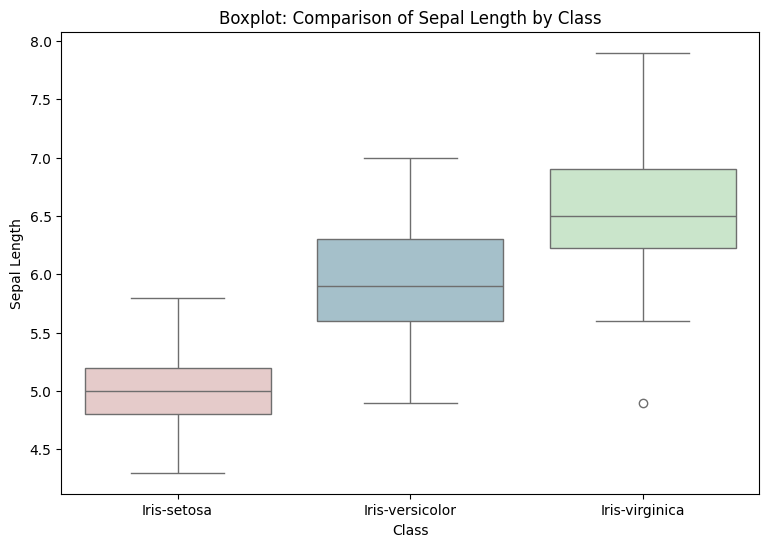

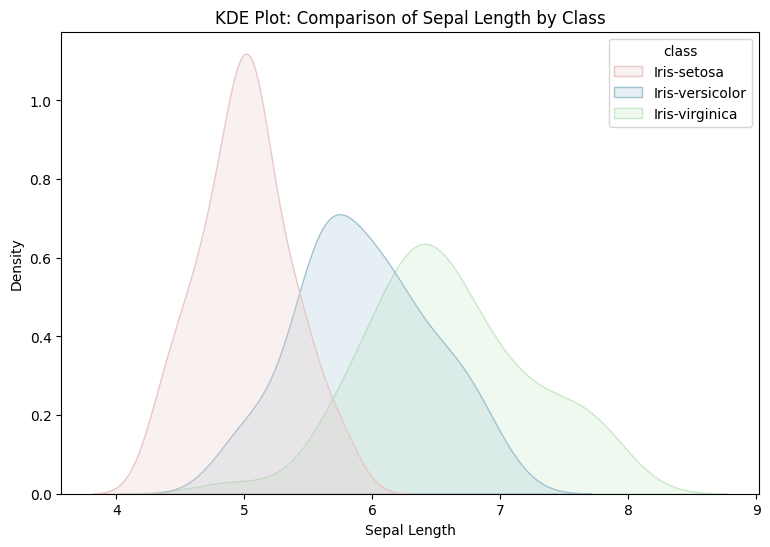

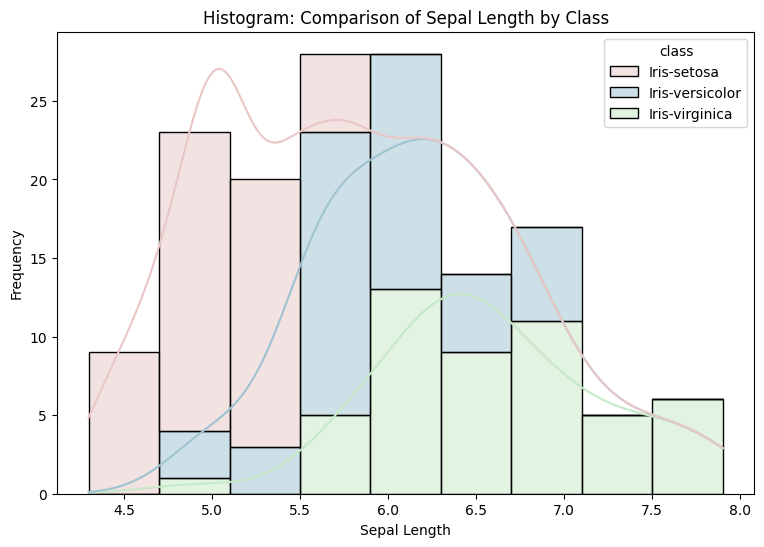

+----+-----------------+--------+----------+--------+--------+------------+-------+-------+------+------+-------+------------+
|    | Class           |   Mean |   Median |   Mode |     SD |   Variance |   Min |    Q₁ |   Q₂ |   Q₃ |   Max |   Skewness |
+====+=================+========+==========+========+========+============+=======+=======+======+======+=======+============+
|  0 | Iris-setosa     |  5.006 |      5   |    5   | 0.3525 |     0.1242 |   4.3 | 4.8   |  5   |  5.2 |   5.8 |     0.1201 |
+----+-----------------+--------+----------+--------+--------+------------+-------+-------+------+------+-------+------------+
|  1 | Iris-versicolor |  5.936 |      5.9 |    5.5 | 0.5162 |     0.2664 |   4.9 | 5.6   |  5.9 |  6.3 |   7   |     0.1054 |
+----+-----------------+--------+----------+--------+--------+------------+-------+-------+------+------+-------+------------+
|  2 | Iris-virginica  |  6.588 |      6.5 |    6.3 | 0.6359 |     0.4043 |   4.9 | 6.225 |  6.5 |  6.9 |   7.9

In [15]:
showStatistics(attr_name)
plot_histogram(attr_name)
comparison_by_class(attr_name)
calculate_class_statistics(attr_name)

## <font color='#e89c9a'><ul><li>Sepal Width</li></ul></font>

In [16]:
attr_name = 'sepal width'

+-----------+---------+
|           |   Value |
+===========+=========+
| Mean:     |  3.054  |
+-----------+---------+
| Median:   |  3      |
+-----------+---------+
| Mode:     |  3      |
+-----------+---------+
| SD:       |  0.4336 |
+-----------+---------+
| Variance: |  0.188  |
+-----------+---------+
| Min:      |  2      |
+-----------+---------+
| Q₁:       |  2.8    |
+-----------+---------+
| Q₂:       |  3      |
+-----------+---------+
| Q₃:       |  3.3    |
+-----------+---------+
| Max:      |  4.4    |
+-----------+---------+
| Skewness: |  0.3341 |
+-----------+---------+


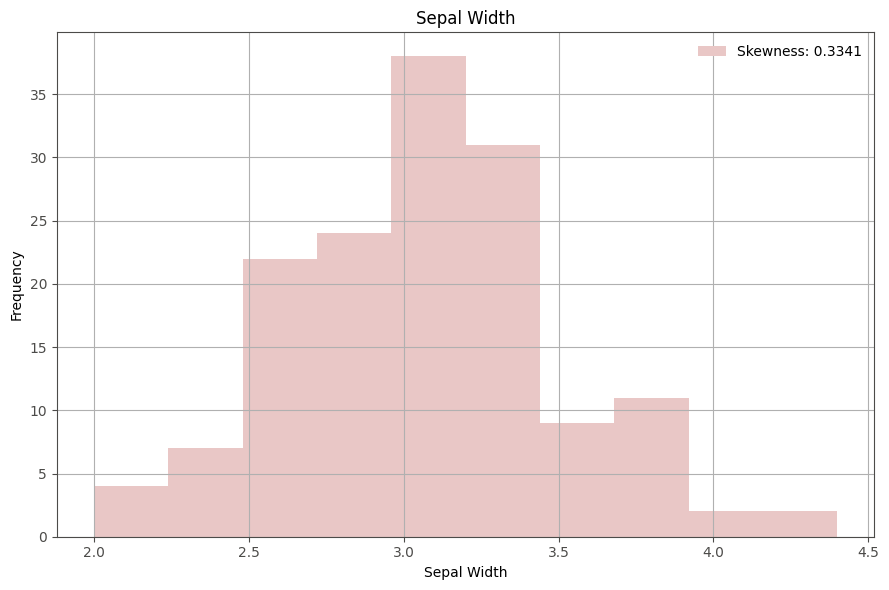

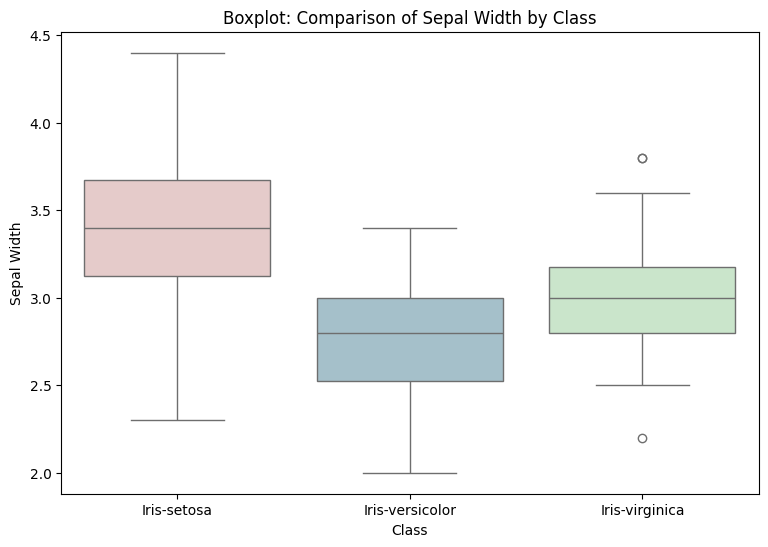

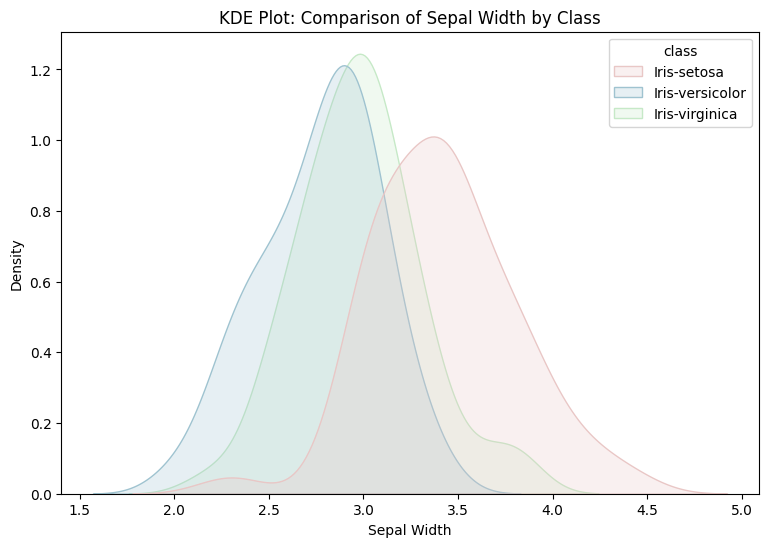

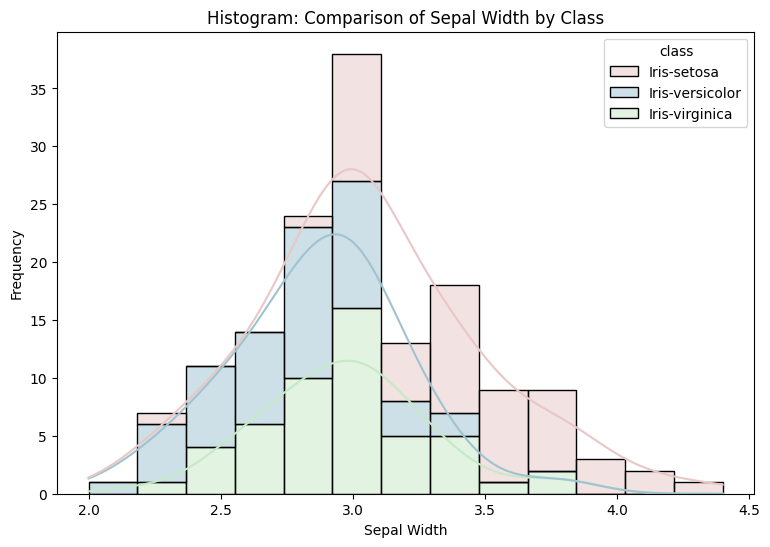

+----+-----------------+--------+----------+--------+--------+------------+-------+-------+------+-------+-------+------------+
|    | Class           |   Mean |   Median |   Mode |     SD |   Variance |   Min |    Q₁ |   Q₂ |    Q₃ |   Max |   Skewness |
+====+=================+========+==========+========+========+============+=======+=======+======+=======+=======+============+
|  0 | Iris-setosa     |  3.418 |      3.4 |    3.4 | 0.381  |     0.1452 |   2.3 | 3.125 |  3.4 | 3.675 |   4.4 |     0.1071 |
+----+-----------------+--------+----------+--------+--------+------------+-------+-------+------+-------+-------+------------+
|  1 | Iris-versicolor |  2.77  |      2.8 |    3   | 0.3138 |     0.0985 |   2   | 2.525 |  2.8 | 3     |   3.4 |    -0.3628 |
+----+-----------------+--------+----------+--------+--------+------------+-------+-------+------+-------+-------+------------+
|  2 | Iris-virginica  |  2.974 |      3   |    3   | 0.3225 |     0.104  |   2.2 | 2.8   |  3   | 3.175

In [17]:
showStatistics(attr_name)
plot_histogram(attr_name)
comparison_by_class(attr_name)
calculate_class_statistics(attr_name)

## <font color='#e89c9a'><ul><li>Petal Length</li></ul></font>

In [18]:
attr_name = 'petal length'

+-----------+---------+
|           |   Value |
+===========+=========+
| Mean:     |  3.7587 |
+-----------+---------+
| Median:   |  4.35   |
+-----------+---------+
| Mode:     |  1.5    |
+-----------+---------+
| SD:       |  1.7644 |
+-----------+---------+
| Variance: |  3.1132 |
+-----------+---------+
| Min:      |  1      |
+-----------+---------+
| Q₁:       |  1.6    |
+-----------+---------+
| Q₂:       |  4.35   |
+-----------+---------+
| Q₃:       |  5.1    |
+-----------+---------+
| Max:      |  6.9    |
+-----------+---------+
| Skewness: | -0.2745 |
+-----------+---------+


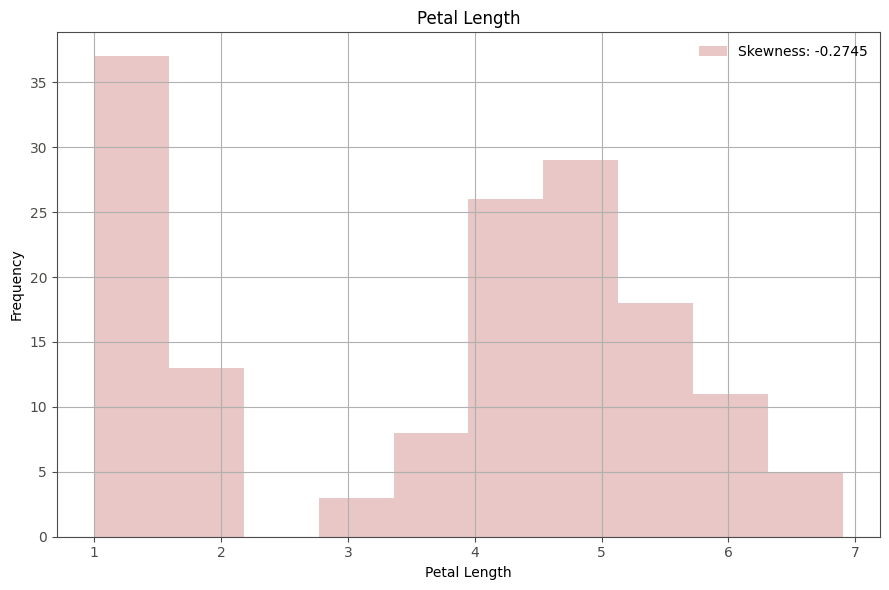

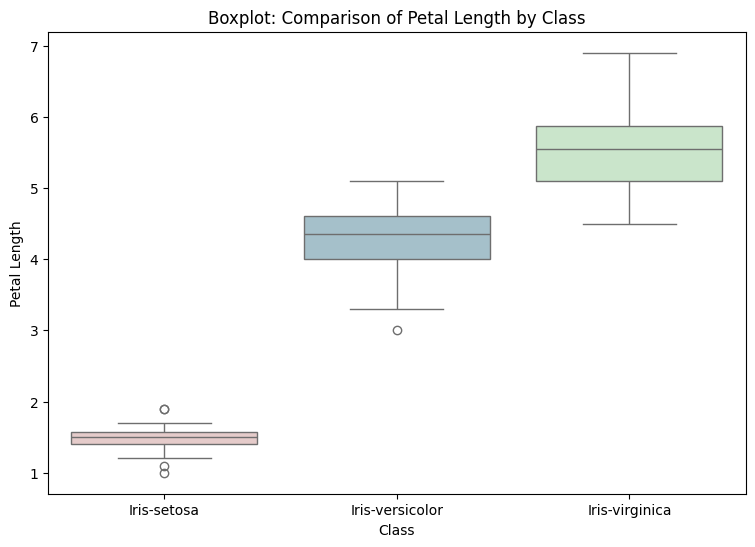

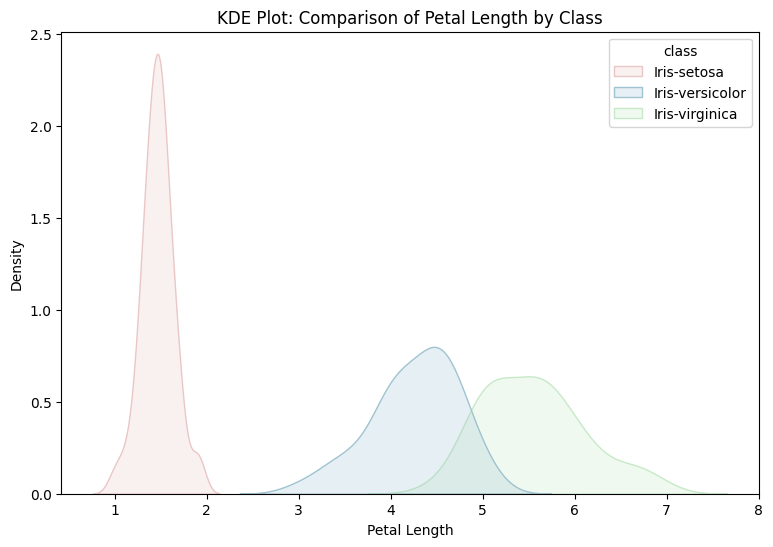

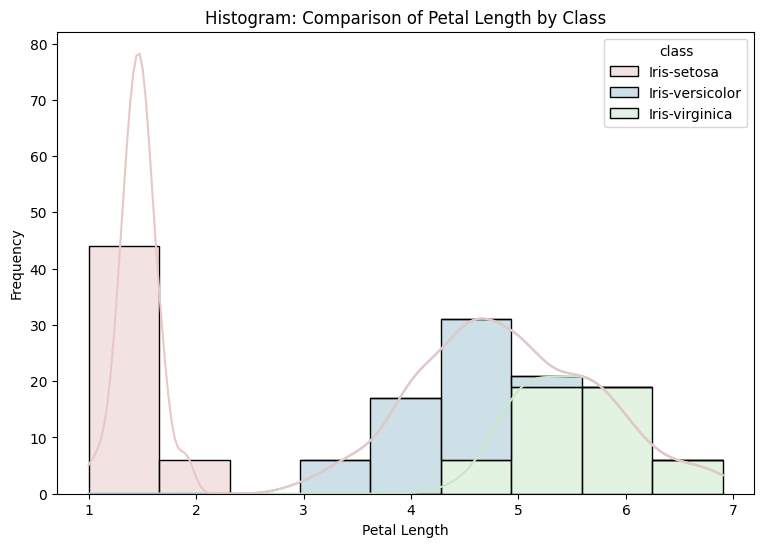

+----+-----------------+--------+----------+--------+--------+------------+-------+------+------+-------+-------+------------+
|    | Class           |   Mean |   Median |   Mode |     SD |   Variance |   Min |   Q₁ |   Q₂ |    Q₃ |   Max |   Skewness |
+====+=================+========+==========+========+========+============+=======+======+======+=======+=======+============+
|  0 | Iris-setosa     |  1.464 |     1.5  |    1.5 | 0.1735 |     0.0301 |   1   |  1.4 | 1.5  | 1.575 |   1.9 |     0.0718 |
+----+-----------------+--------+----------+--------+--------+------------+-------+------+------+-------+-------+------------+
|  1 | Iris-versicolor |  4.26  |     4.35 |    4.5 | 0.4699 |     0.2208 |   3   |  4   | 4.35 | 4.6   |   5.1 |    -0.6065 |
+----+-----------------+--------+----------+--------+--------+------------+-------+------+------+-------+-------+------------+
|  2 | Iris-virginica  |  5.552 |     5.55 |    5.1 | 0.5519 |     0.3046 |   4.5 |  5.1 | 5.55 | 5.875 |   6.9

In [19]:
showStatistics(attr_name)
plot_histogram(attr_name)
comparison_by_class(attr_name)
calculate_class_statistics(attr_name)

## <font color='#e89c9a'><ul><li>Petal Width</li></ul></font>

In [20]:
attr_name = 'petal width'

+-----------+---------+
|           |   Value |
+===========+=========+
| Mean:     |  1.1987 |
+-----------+---------+
| Median:   |  1.3    |
+-----------+---------+
| Mode:     |  0.2    |
+-----------+---------+
| SD:       |  0.7632 |
+-----------+---------+
| Variance: |  0.5824 |
+-----------+---------+
| Min:      |  0.1    |
+-----------+---------+
| Q₁:       |  0.3    |
+-----------+---------+
| Q₂:       |  1.3    |
+-----------+---------+
| Q₃:       |  1.8    |
+-----------+---------+
| Max:      |  2.5    |
+-----------+---------+
| Skewness: | -0.105  |
+-----------+---------+


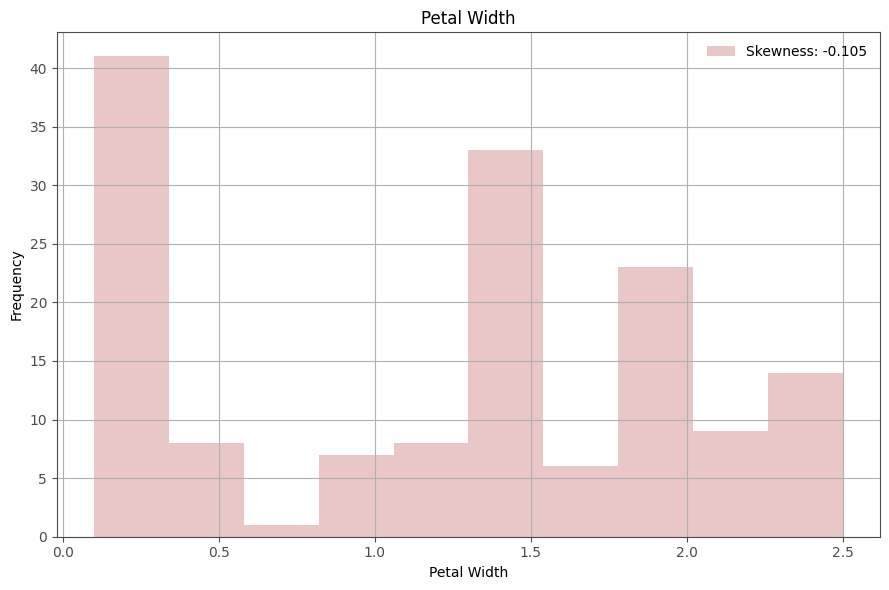

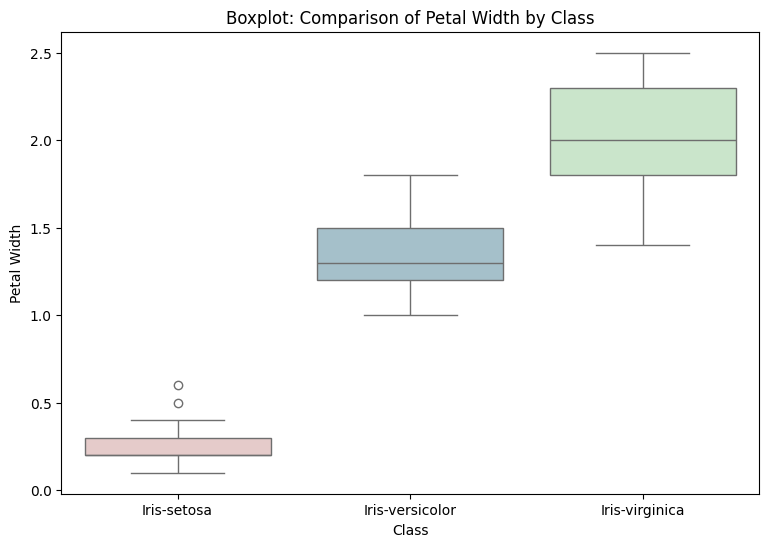

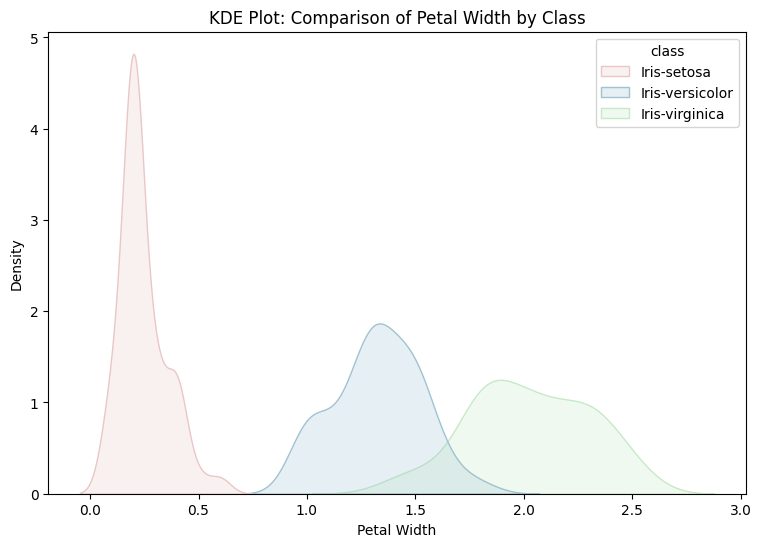

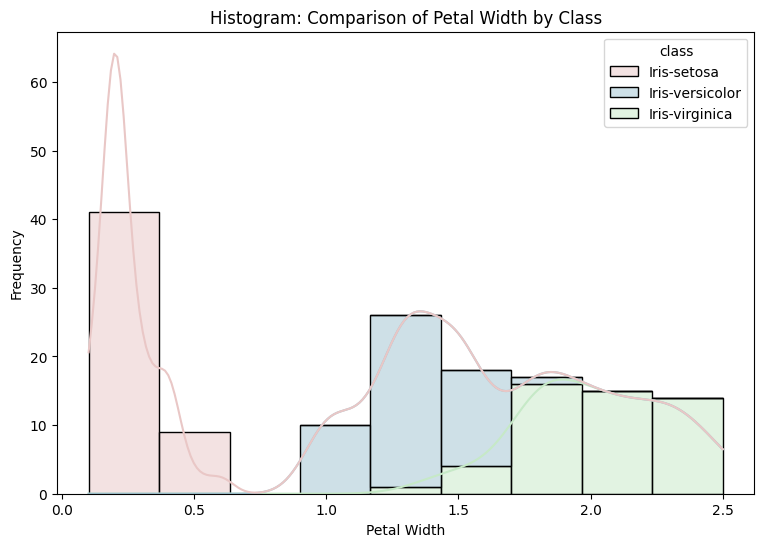

+----+-----------------+--------+----------+--------+--------+------------+-------+------+------+------+-------+------------+
|    | Class           |   Mean |   Median |   Mode |     SD |   Variance |   Min |   Q₁ |   Q₂ |   Q₃ |   Max |   Skewness |
+====+=================+========+==========+========+========+============+=======+======+======+======+=======+============+
|  0 | Iris-setosa     |  0.244 |      0.2 |    0.2 | 0.1072 |     0.0115 |   0.1 |  0.2 |  0.2 |  0.3 |   0.6 |     1.1972 |
+----+-----------------+--------+----------+--------+--------+------------+-------+------+------+------+-------+------------+
|  1 | Iris-versicolor |  1.326 |      1.3 |    1.3 | 0.1978 |     0.0391 |   1   |  1.2 |  1.3 |  1.5 |   1.8 |    -0.0312 |
+----+-----------------+--------+----------+--------+--------+------------+-------+------+------+------+-------+------------+
|  2 | Iris-virginica  |  2.026 |      2   |    1.8 | 0.2747 |     0.0754 |   1.4 |  1.8 |  2   |  2.3 |   2.5 |    -0

In [21]:
showStatistics(attr_name)
plot_histogram(attr_name)
comparison_by_class(attr_name)
calculate_class_statistics(attr_name)

# <font color='#3e9dbf'>K Nearest Neighbors (KNN) Classifier</font>

## <font color='#e89c9a'><ul><li>Train 80 : Test 20</li></ul></font>

In [22]:
ratio = (80, 20)

### <font color='#9ae89c'><ul style="list-style-type:circle;"><li>Data Preprocess</li></ul></font>

In [23]:
# Spilt Train and Test Data
X_train, X_test, y_train, y_test = split_data(test_size=(ratio[1]*0.01))
show_class_counts(y_train, y_test)

X shape: (150, 4)
y shape: (150,)
Training and Testing Data Class Counts:
+----+-----------------+---------------+--------------+
|    | Class           |   Train Count |   Test Count |
+====+=================+===============+==============+
|  0 | Iris-setosa     |            40 |           10 |
+----+-----------------+---------------+--------------+
|  1 | Iris-versicolor |            41 |            9 |
+----+-----------------+---------------+--------------+
|  2 | Iris-virginica  |            39 |           11 |
+----+-----------------+---------------+--------------+
|  3 | Total           |           120 |           30 |
+----+-----------------+---------------+--------------+


In [24]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### <font color='#9ae89c'><ul style="list-style-type:circle;"><li>Error Rate</li></ul></font>

+-----------+---------+---------+------------------+------------------+
| Weights   |   K Min |   K Max |   Min Mean Error |   Max Mean Error |
+===========+=========+=========+==================+==================+
| Uniform:  |       2 |      37 |                0 |             0.07 |
+-----------+---------+---------+------------------+------------------+
| Distance: |       2 |       1 |                0 |             0    |
+-----------+---------+---------+------------------+------------------+


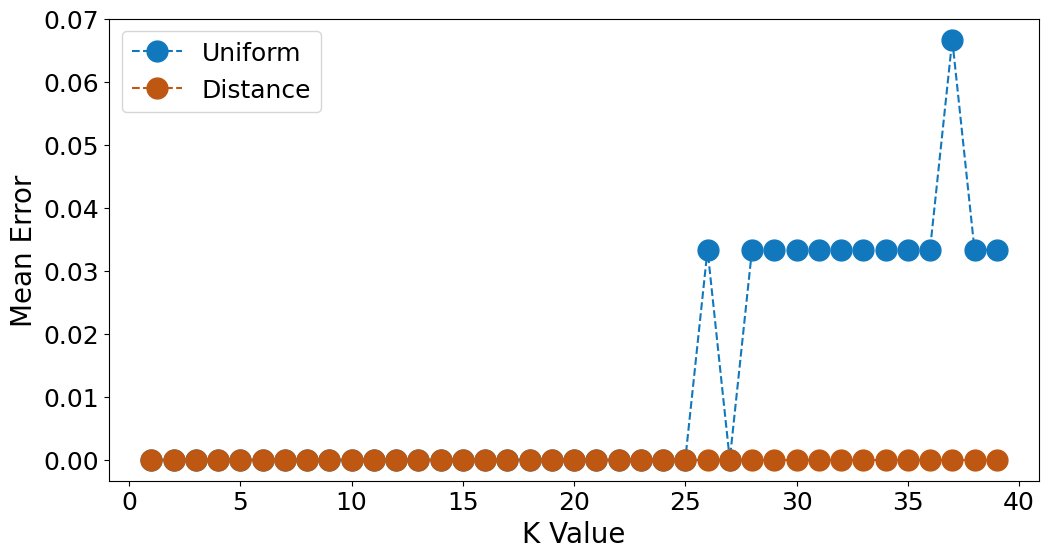

In [25]:
minError_uniform, minError_distance, maxError_uniform, maxError_distance = plot_error_rate(X_train, y_train, X_test, y_test)

### <font color='#9ae89c'><ul style="list-style-type:circle;"><li>Weights: uniform</li></ul></font>

#### <font color='#efefef'><ul style="list-style-type:square;"><li>Train Model with K = Min Mean Error</li></ul></font>

In [26]:
classifier = KNeighborsClassifier(n_neighbors=minError_uniform, weights='uniform')
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

Confusion matrix, without normalization


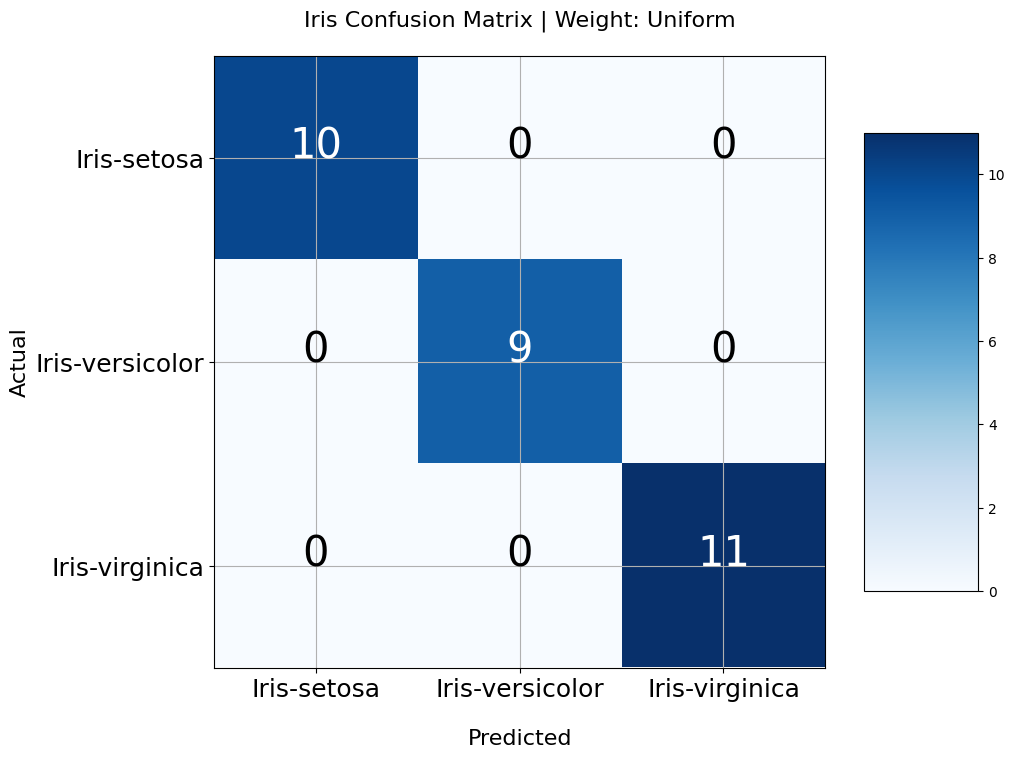

Accuracy: 100.00%


In [27]:
# Confusion matrix
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], weight_type='uniform', ratio=ratio)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

#### <font color='#efefef'><ul style="list-style-type:square;"><li>Train Model with K = Max Mean Error</li></ul></font>

In [28]:
classifier = KNeighborsClassifier(n_neighbors=maxError_uniform, weights='uniform')
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=37)

Confusion matrix, without normalization


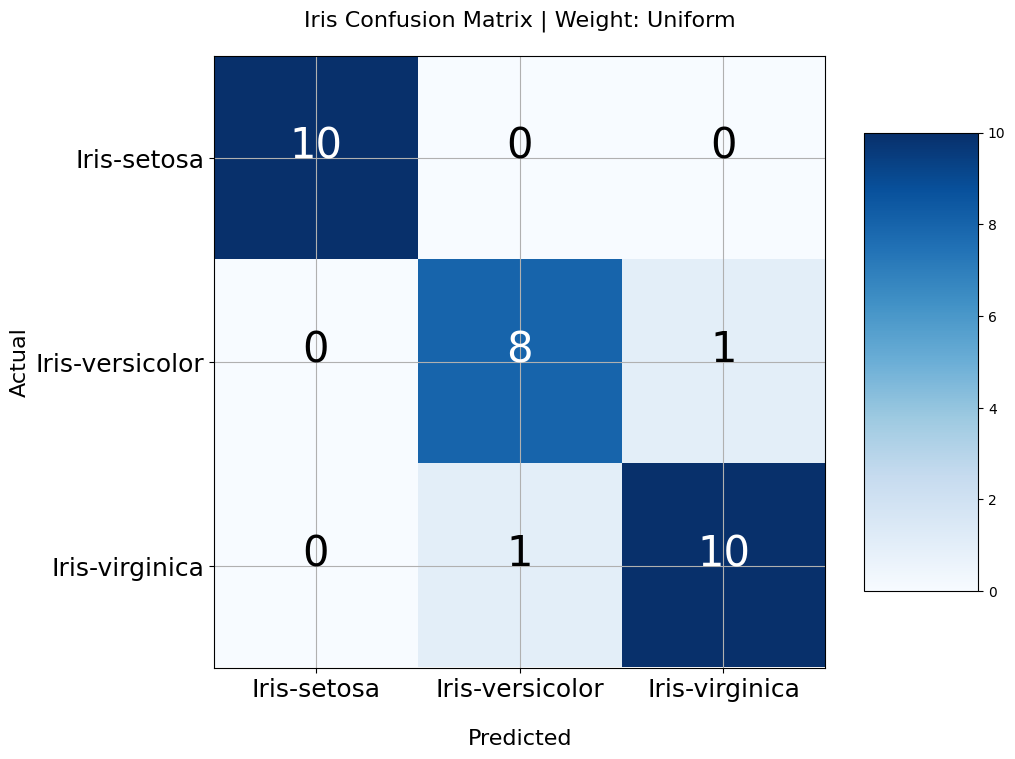

Accuracy: 93.33%


In [29]:
# Confusion matrix
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], weight_type='uniform', ratio=ratio)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

### <font color='#9ae89c'><ul style="list-style-type:circle;"><li>Weights: distance</li></ul></font>

#### <font color='#efefef'><ul style="list-style-type:square;"><li>Train Model with K = Min Mean Error</li></ul></font>

In [30]:
classifier = KNeighborsClassifier(n_neighbors=minError_distance, weights='distance')
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2, weights='distance')

Confusion matrix, without normalization


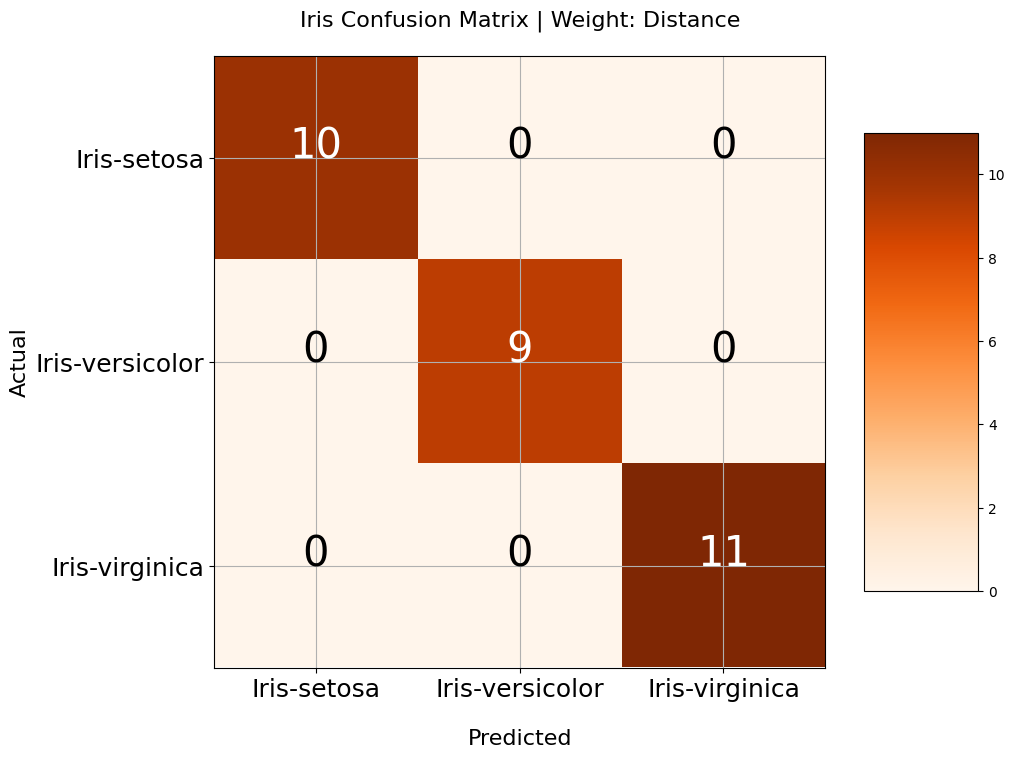

Accuracy: 100.00%


In [31]:
# Confusion matrix
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], weight_type='distance', ratio=ratio)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

#### <font color='#efefef'><ul style="list-style-type:square;"><li>Train Model with K = Max Mean Error</li></ul></font>

In [32]:
classifier = KNeighborsClassifier(n_neighbors=maxError_distance, weights='distance')
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1, weights='distance')

Confusion matrix, without normalization


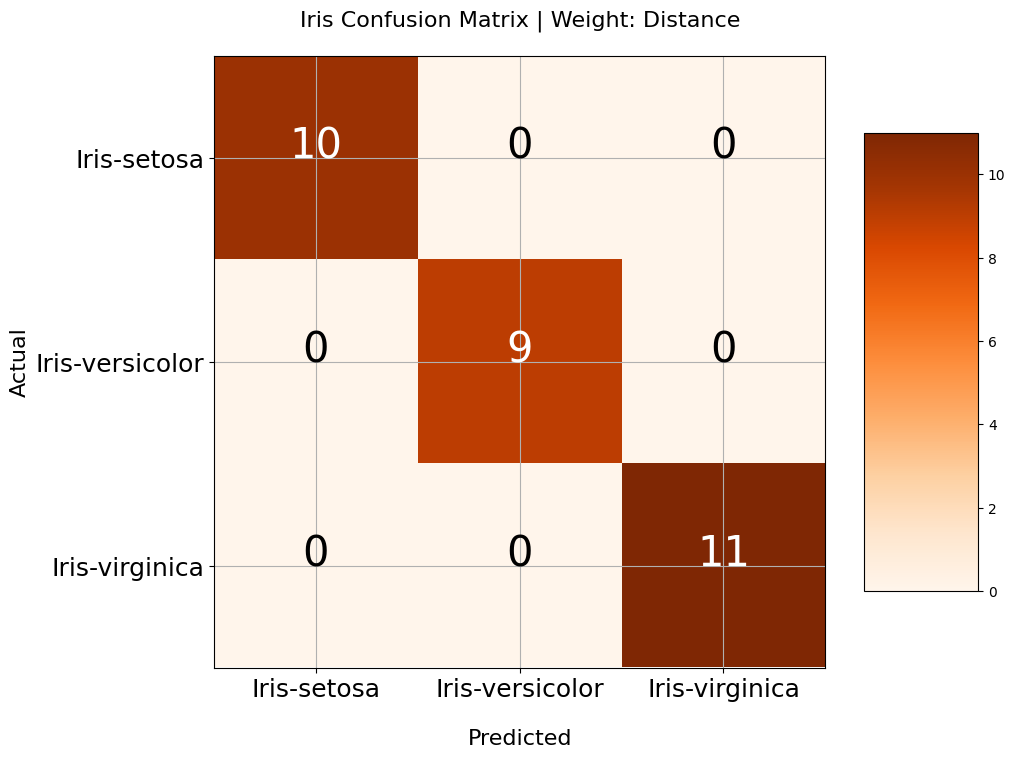

Accuracy: 100.00%


In [33]:
# Confusion matrix
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], weight_type='distance', ratio=ratio)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

## <font color='#e89c9a'><ul><li>Train 70 : Test 30</li></ul></font>

In [34]:
ratio = (70, 30)

### <font color='#9ae89c'><ul style="list-style-type:circle;"><li>Data Preprocess</li></ul></font>

In [35]:
# Spilt Train and Test Data
X_train, X_test, y_train, y_test = split_data(test_size=(ratio[1]*0.01))
show_class_counts(y_train, y_test)

X shape: (150, 4)
y shape: (150,)
Training and Testing Data Class Counts:
+----+-----------------+---------------+--------------+
|    | Class           |   Train Count |   Test Count |
+====+=================+===============+==============+
|  0 | Iris-setosa     |            31 |           19 |
+----+-----------------+---------------+--------------+
|  1 | Iris-versicolor |            37 |           13 |
+----+-----------------+---------------+--------------+
|  2 | Iris-virginica  |            37 |           13 |
+----+-----------------+---------------+--------------+
|  3 | Total           |           105 |           45 |
+----+-----------------+---------------+--------------+


In [36]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### <font color='#9ae89c'><ul style="list-style-type:circle;"><li>Error Rate</li></ul></font>

+-----------+---------+---------+------------------+------------------+
| Weights   |   K Min |   K Max |   Min Mean Error |   Max Mean Error |
+===========+=========+=========+==================+==================+
| Uniform:  |       3 |      32 |                0 |             0.11 |
+-----------+---------+---------+------------------+------------------+
| Distance: |       3 |       1 |                0 |             0.02 |
+-----------+---------+---------+------------------+------------------+


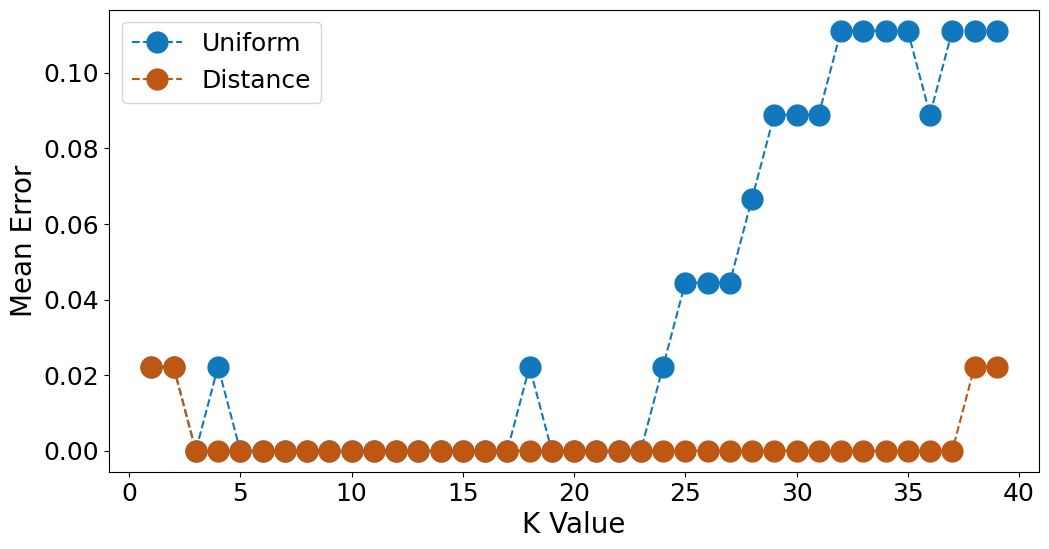

In [37]:
minError_uniform, minError_distance, maxError_uniform, maxError_distance = plot_error_rate(X_train, y_train, X_test, y_test)

### <font color='#9ae89c'><ul style="list-style-type:circle;"><li>Weights: uniform</li></ul></font>

#### <font color='#efefef'><ul style="list-style-type:square;"><li>Train Model with K = Min Mean Error</li></ul></font>

In [38]:
classifier = KNeighborsClassifier(n_neighbors=minError_uniform, weights='uniform')
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

Confusion matrix, without normalization


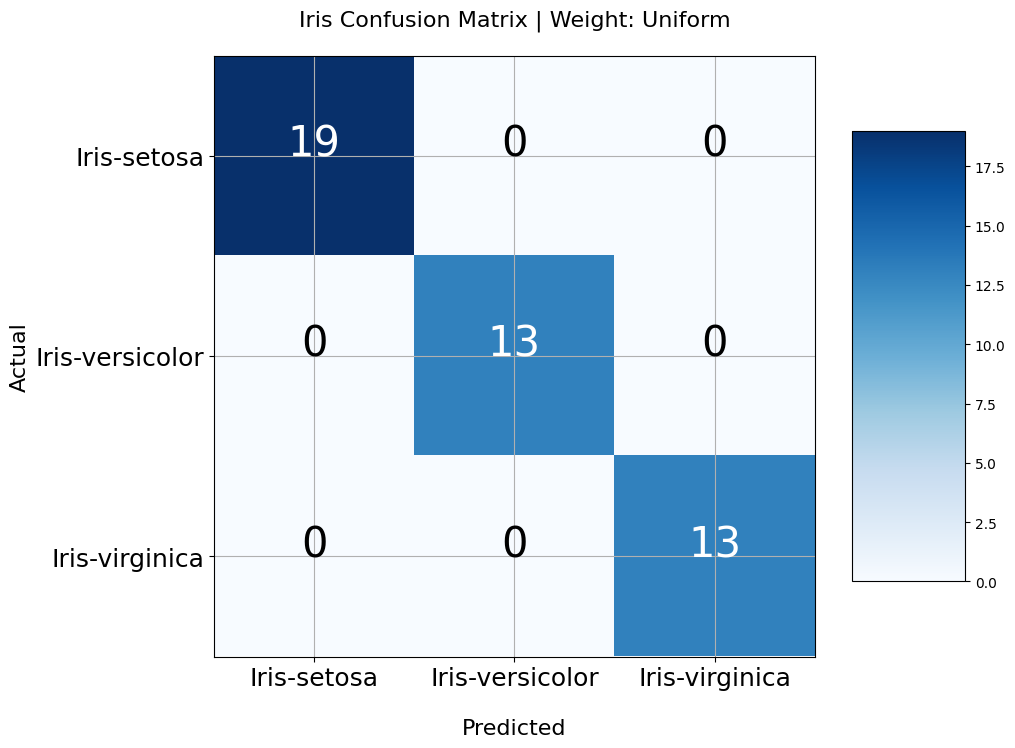

Accuracy: 100.00%


In [39]:
# Confusion matrix
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], weight_type='uniform', ratio=ratio)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

#### <font color='#efefef'><ul style="list-style-type:square;"><li>Train Model with K = Max Mean Error</li></ul></font>

In [40]:
classifier = KNeighborsClassifier(n_neighbors=maxError_uniform, weights='uniform')
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=32)

Confusion matrix, without normalization


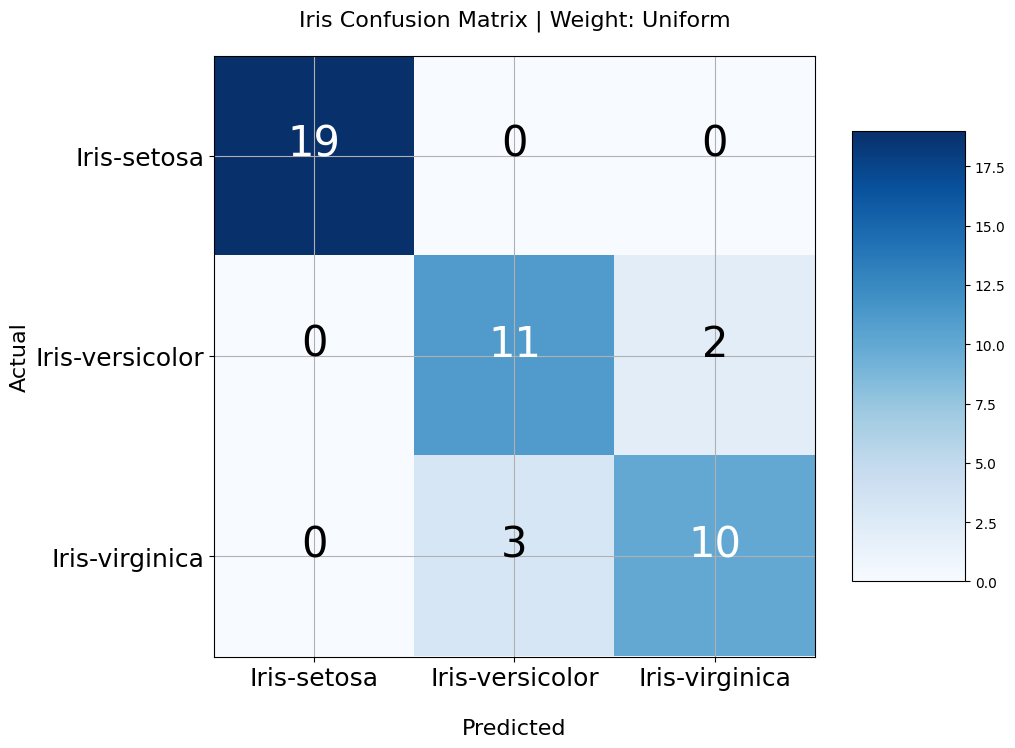

Accuracy: 88.89%


In [41]:
# Confusion matrix
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], weight_type='uniform', ratio=ratio)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

### <font color='#9ae89c'><ul style="list-style-type:circle;"><li>Weights: distance</li></ul></font>

#### <font color='#efefef'><ul style="list-style-type:square;"><li>Train Model with K = Min Mean Error</li></ul></font>

In [42]:
classifier = KNeighborsClassifier(n_neighbors=minError_distance, weights='distance')
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3, weights='distance')

Confusion matrix, without normalization


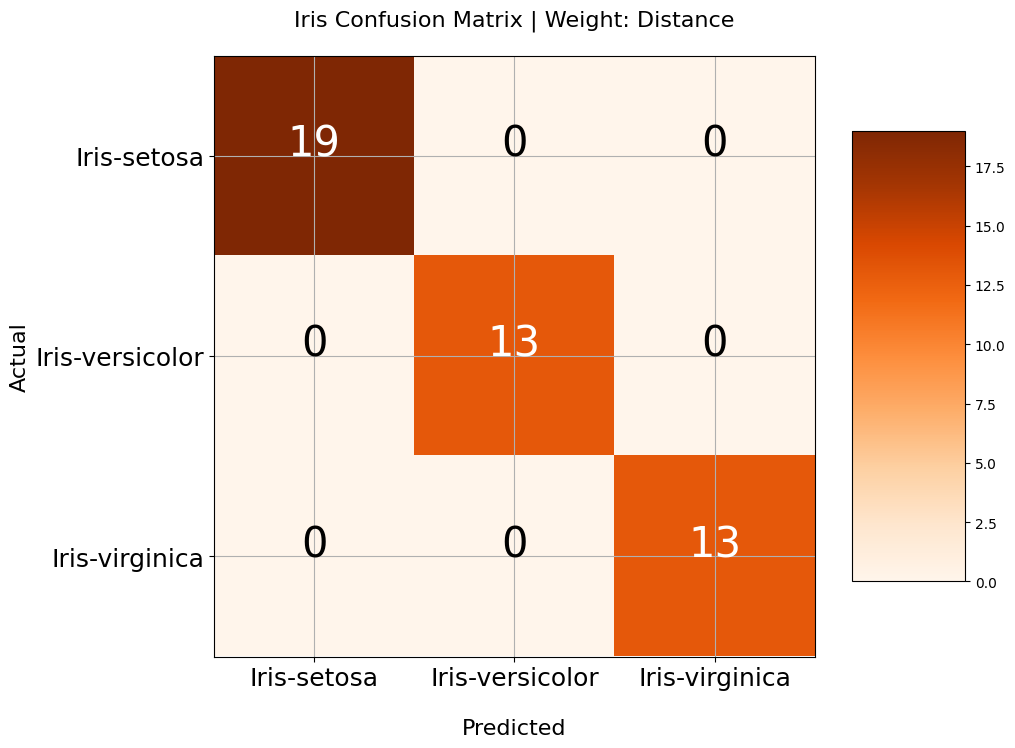

Accuracy: 100.00%


In [43]:
# Confusion matrix
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], weight_type='distance', ratio=ratio)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

#### <font color='#efefef'><ul style="list-style-type:square;"><li>Train Model with K = Max Mean Error</li></ul></font>

In [44]:
classifier = KNeighborsClassifier(n_neighbors=maxError_distance, weights='distance')
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1, weights='distance')

Confusion matrix, without normalization


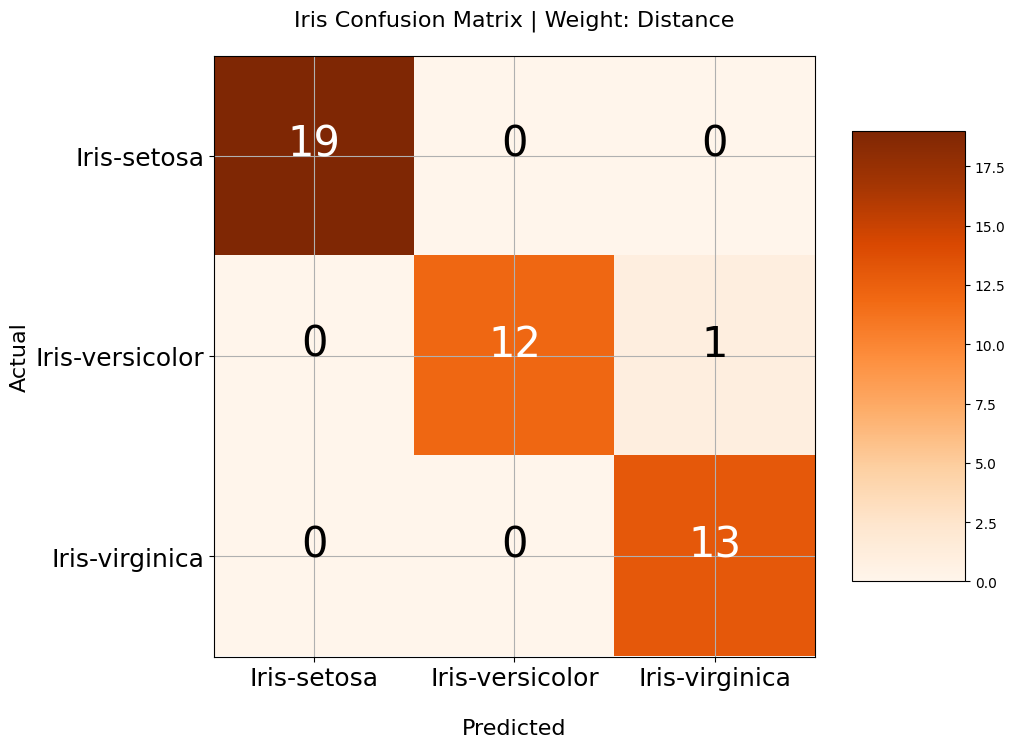

Accuracy: 97.78%


In [45]:
# Confusion matrix
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], weight_type='distance', ratio=ratio)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

## <font color='#e89c9a'><ul><li>Train 60 : Test 40</li></ul></font>

In [46]:
ratio = (60, 40)

### <font color='#9ae89c'><ul style="list-style-type:circle;"><li>Data Preprocess</li></ul></font>

In [47]:
# Spilt Train and Test Data
X_train, X_test, y_train, y_test = split_data(test_size=(ratio[1]*0.01))
show_class_counts(y_train, y_test)

X shape: (150, 4)
y shape: (150,)
Training and Testing Data Class Counts:
+----+-----------------+---------------+--------------+
|    | Class           |   Train Count |   Test Count |
+====+=================+===============+==============+
|  0 | Iris-setosa     |            27 |           23 |
+----+-----------------+---------------+--------------+
|  1 | Iris-versicolor |            31 |           19 |
+----+-----------------+---------------+--------------+
|  2 | Iris-virginica  |            32 |           18 |
+----+-----------------+---------------+--------------+
|  3 | Total           |            90 |           60 |
+----+-----------------+---------------+--------------+


In [48]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### <font color='#9ae89c'><ul style="list-style-type:circle;"><li>Error Rate</li></ul></font>

+-----------+---------+---------+------------------+------------------+
| Weights   |   K Min |   K Max |   Min Mean Error |   Max Mean Error |
+===========+=========+=========+==================+==================+
| Uniform:  |       3 |      36 |             0.02 |             0.15 |
+-----------+---------+---------+------------------+------------------+
| Distance: |       3 |      37 |             0.02 |             0.07 |
+-----------+---------+---------+------------------+------------------+


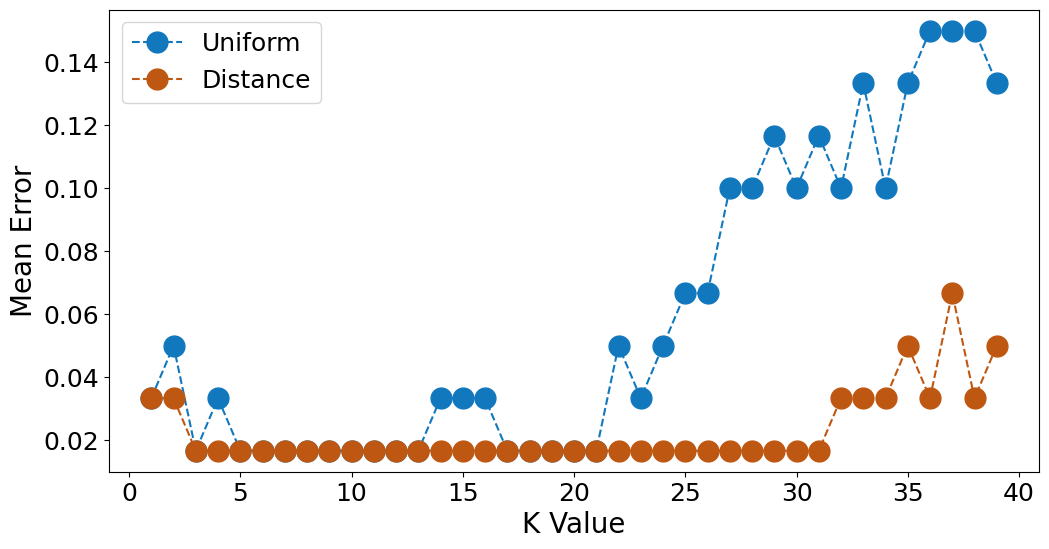

In [49]:
minError_uniform, minError_distance, maxError_uniform, maxError_distance = plot_error_rate(X_train, y_train, X_test, y_test)

### <font color='#9ae89c'><ul style="list-style-type:circle;"><li>Weights: uniform</li></ul></font>

#### <font color='#efefef'><ul style="list-style-type:square;"><li>Train Model with K = Min Mean Error</li></ul></font>

In [50]:
classifier = KNeighborsClassifier(n_neighbors=minError_uniform, weights='uniform')
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

Confusion matrix, without normalization


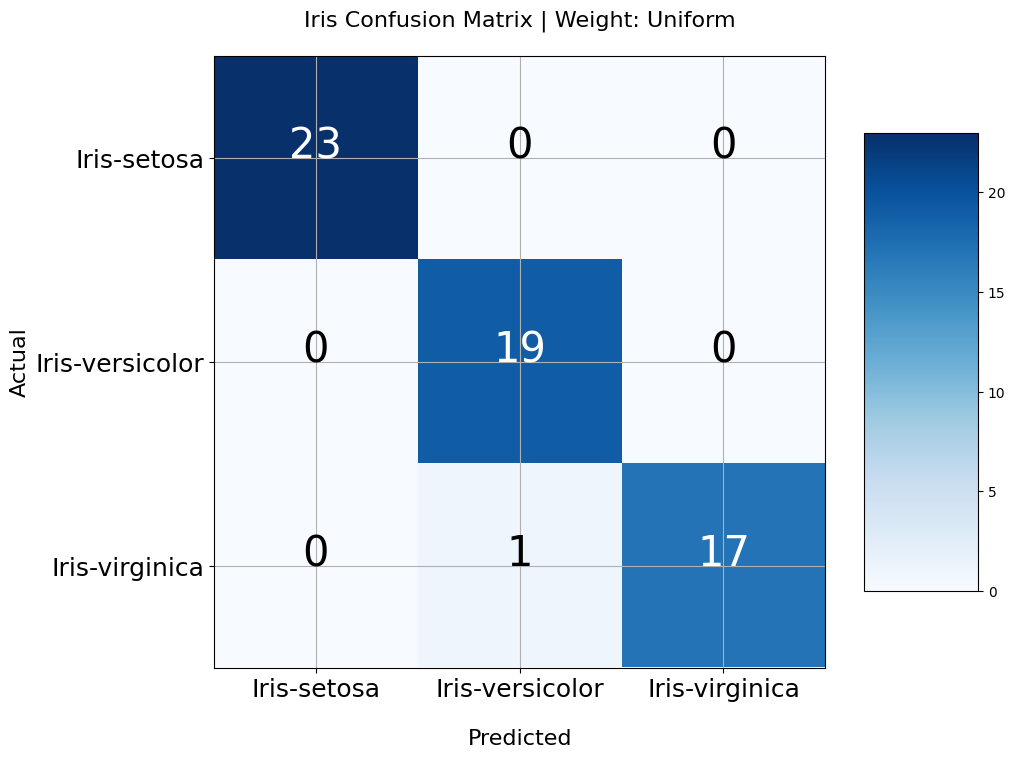

Accuracy: 98.33%


In [51]:
# Confusion matrix
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], weight_type='uniform', ratio=ratio)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

#### <font color='#efefef'><ul style="list-style-type:square;"><li>Train Model with K = Max Mean Error</li></ul></font>

In [52]:
classifier = KNeighborsClassifier(n_neighbors=maxError_uniform, weights='uniform')
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=36)

Confusion matrix, without normalization


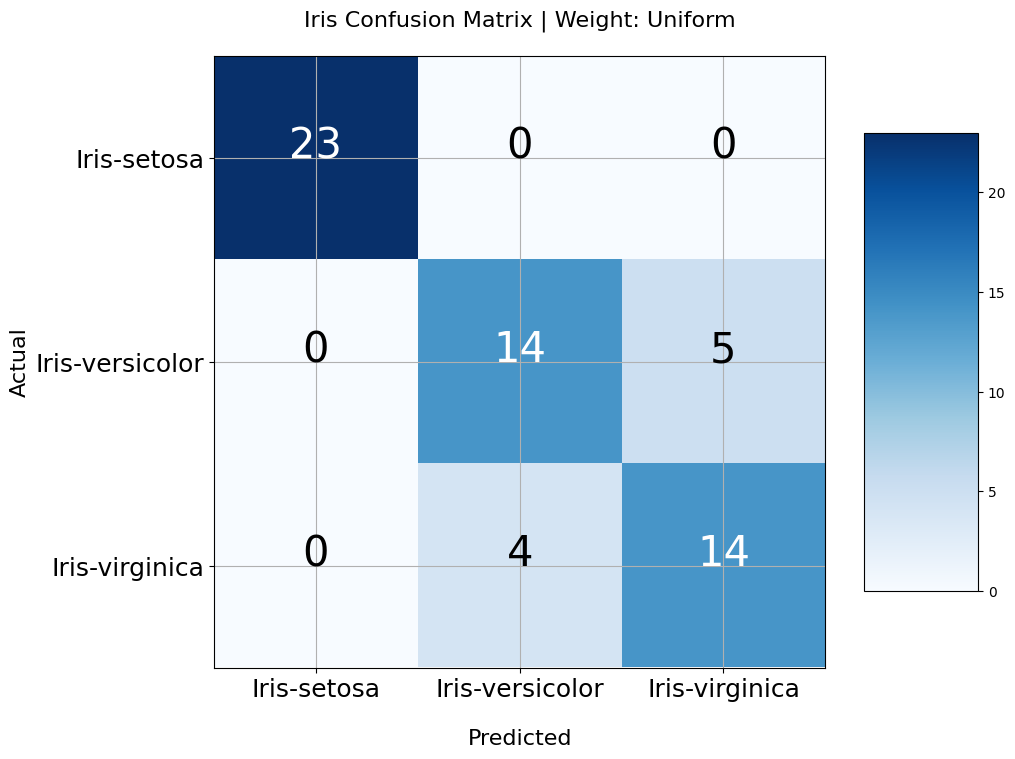

Accuracy: 85.00%


In [53]:
# Confusion matrix
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], weight_type='uniform', ratio=ratio)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

### <font color='#9ae89c'><ul style="list-style-type:circle;"><li>Weights: distance</li></ul></font>

#### <font color='#efefef'><ul style="list-style-type:square;"><li>Train Model with K = Min Mean Error</li></ul></font>

In [54]:
classifier = KNeighborsClassifier(n_neighbors=minError_distance, weights='distance')
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3, weights='distance')

Confusion matrix, without normalization


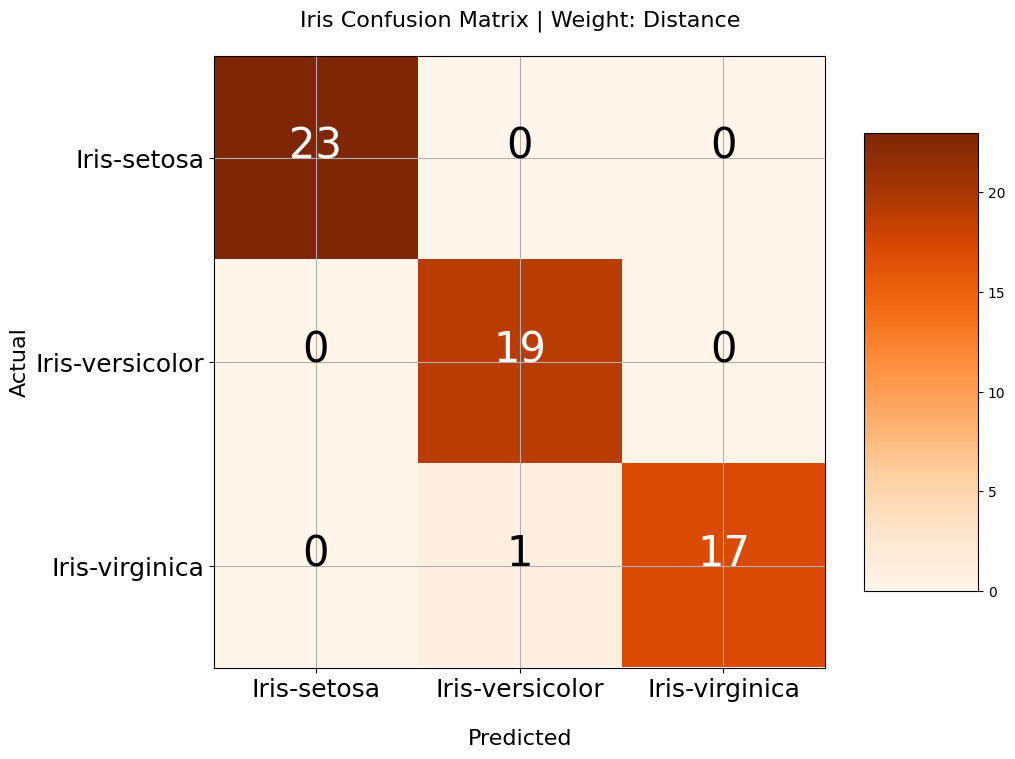

Accuracy: 98.33%


In [55]:
# Confusion matrix
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], weight_type='distance', ratio=ratio)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

#### <font color='#efefef'><ul style="list-style-type:square;"><li>Train Model with K = Max Mean Error</li></ul></font>

In [56]:
classifier = KNeighborsClassifier(n_neighbors=maxError_distance, weights='distance')
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=37, weights='distance')

Confusion matrix, without normalization


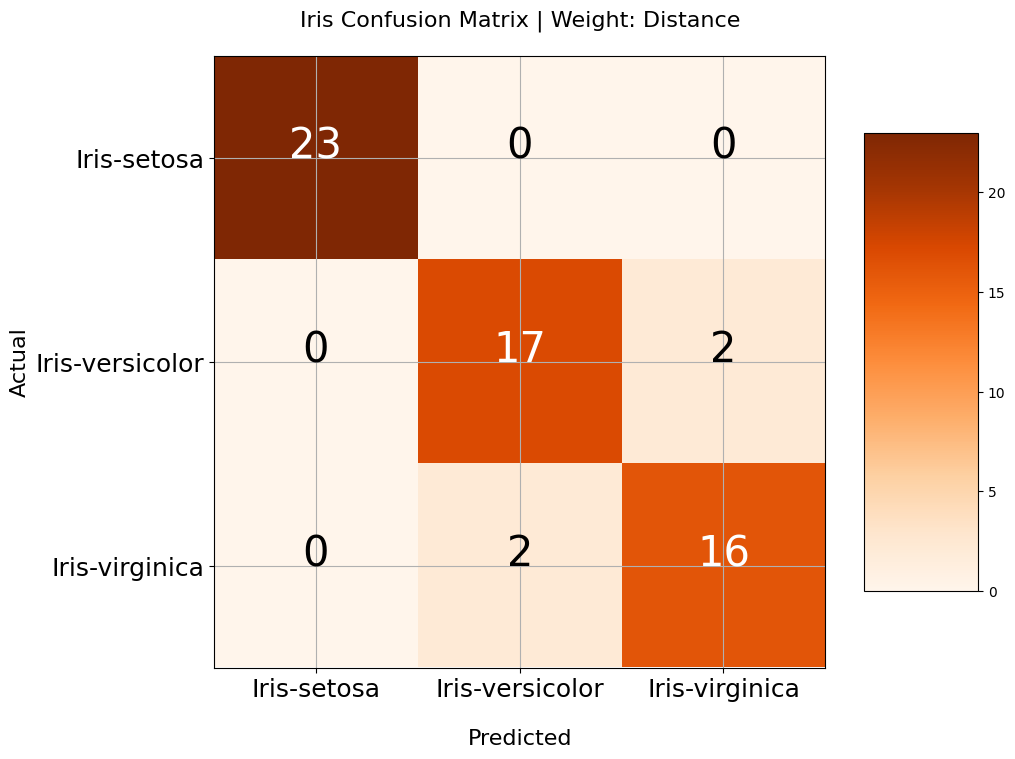

Accuracy: 93.33%


In [57]:
# Confusion matrix
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], weight_type='distance', ratio=ratio)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")